# Email Spam Classification using Naive Bayes Classifier

### Import requirements

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay
import kagglehub
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Download NLTK resources
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/mehran/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/mehran/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/mehran/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/mehran/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/mehran/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_dat

True

### Dataset

In [2]:
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")
path

'/home/mehran/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1'

#### Loading the dataset

In [3]:
data = pd.read_csv(path + '/emails.csv')

#### Dataset Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data.isnull().count()

Email No.     5172
the           5172
to            5172
ect           5172
and           5172
              ... 
military      5172
allowing      5172
ff            5172
dry           5172
Prediction    5172
Length: 3002, dtype: int64

##### Remove 'Email No.' feature from the dataset

In [7]:
data = data.drop(columns=['Email No.'])

#### Separate labels from the dataset

In [8]:
labels = data['Prediction']
X = data.drop(columns=['Prediction'])

In [19]:
vocabulary = list(X.columns)

In [9]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

#### Train-test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

### Training phase

#### Declare the Naive Bayes Classifier and fit on the data

In [11]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

### Evaluation phase

In [12]:
y_pred = nb_model.predict(X_test)

### Evaluation Metrics

#### Confusion Matrix

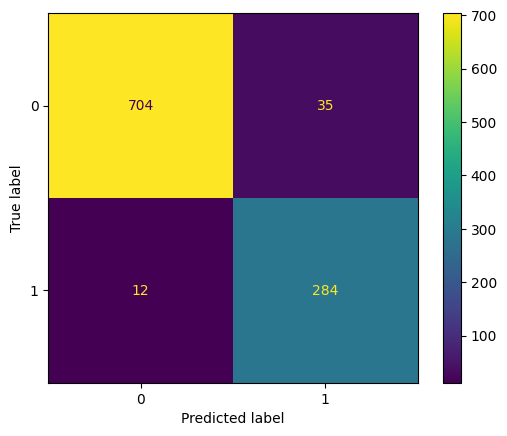

In [13]:
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### Classification Report

In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



#### Precision-Recall Display

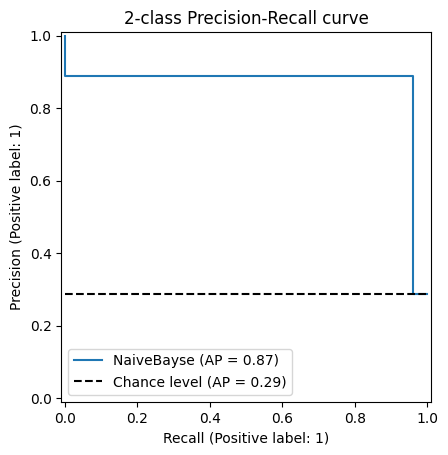

In [15]:
display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="NaiveBayse", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### F1-score

In [16]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.9235772357723577


#### Predict on different custom emails:

In [ ]:
def preprocess_email(email_text):
    words = word_tokenize(email_text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    word_counts = Counter(words)
    feature_vector = [word_counts.get(word, 0) for word in vocabulary]
    return feature_vector

# Function to predict email classification
def predict_email(email_text):
    word_counts_vector = preprocess_email(email_text)
    prediction = nb_model.predict([word_counts_vector])
    return "Spam" if prediction[0] == 1 else "Not Spam"

In [32]:
# Email samples
test_emails = [
    "Congratulations! You've won a free iPhone. Click here to claim now!",
    "Hey, let's catch up for lunch tomorrow. Let me know your available time.",
    "Limited-time offer! Get 50% off on all products. Hurry up!",
    "Dear John, please find attached the documents for review. Let me know if you have any questions.",
    "Congratulations! You have been selected for a $1000 gift card. Click the link to claim now!",
    "Hey, are you coming to the meeting at 3 PM? Let me know if you need the agenda.",
    "Your Netflix subscription is about to expire! Renew now to avoid service interruption.",
    "URGENT: Your bank account has been compromised. Click here to secure it immediately!",
    "Can you send me the project files by tomorrow? Thanks!",
    "Limited-time offer: Get 80% off on all electronics. Order now before it’s gone!",
    "Reminder: Your dental appointment is scheduled for next Monday at 10 AM.",
    "You’ve won a free vacation to the Bahamas! Call now to confirm your prize.",
    "Hey Mom, I just landed. I'll call you once I get my luggage.",
    "Dear customer, your invoice for last month's services is attached. Please review and process the payment."
]

if __name__ == '__main__':

    for counter, email in enumerate(test_emails):
        print(f"Email {counter}: {email}\nPrediction: {predict_email(email)}\n")

Email 0: Congratulations! You've won a free iPhone. Click here to claim now!
Prediction: Spam

Email 1: Hey, let's catch up for lunch tomorrow. Let me know your available time.
Prediction: Not Spam

Email 2: Limited-time offer! Get 50% off on all products. Hurry up!
Prediction: Spam

Email 3: Dear John, please find attached the documents for review. Let me know if you have any questions.
Prediction: Not Spam

Email 4: Congratulations! You have been selected for a $1000 gift card. Click the link to claim now!
Prediction: Spam

Email 5: Hey, are you coming to the meeting at 3 PM? Let me know if you need the agenda.
Prediction: Not Spam

Email 6: Your Netflix subscription is about to expire! Renew now to avoid service interruption.
Prediction: Spam

Email 7: URGENT: Your bank account has been compromised. Click here to secure it immediately!
Prediction: Spam

Email 8: Can you send me the project files by tomorrow? Thanks!
Prediction: Not Spam

Email 9: Limited-time offer: Get 80% off on a

/home/mehran/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/mehran/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/mehran/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/mehran/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/mehran/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Multin